# Imports

In [1]:
# Let us import all the necessary libraries

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from pyhht import EMD
from scipy.stats import norm
from scipy.stats import entropy

# Import Data

In [3]:
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

labels = []
data = []
for i in range(1, 33): 
    fileph =  "C://Users//Charan//Documents//PycharmProjects//ugproject//data_preprocessed//s" + format(i, '02') + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])  #32,40,40,8064

In [4]:
data=np.array(data)

In [5]:
# Data for the 1st participant and 1st trial

eeg_data=data[0, 0, :32, 384:8064]

In [6]:
eeg_data.shape

# This explains that the data of single trial has 32 channels and each channel contains 7680 datapoints

(32, 7680)

# Emperical Mode Decomposition

In [7]:
"""
EMD object is an instance of the EMD class that represents the EMD algorithm. 
The EMD object can be used to decompose a signal into its IMFs using the decompose() method. 
The resulting IMFs can be accessed using the imfs attribute of the EMD object, 
which returns a 2D array where each row represents an IMF.
"""

decomposer = EMD(eeg_data.ravel())
imfs = decomposer.decompose()


Mode 1, Iteration 600
1 minima > 0; 58973 maxima < 0.
Mode 2, Iteration 800
4 minima > 0; 33450 maxima < 0.
Mode 2, Iteration 1000
2 minima > 0; 34152 maxima < 0.
Mode 2, Iteration 1200
1 minima > 0; 34433 maxima < 0.
Mode 2, Iteration 1400
0 minima > 0; 34652 maxima < 0.
Mode 3, Iteration 1600
4 minima > 0; 21329 maxima < 0.
Mode 4, Iteration 1800
8 minima > 0; 13178 maxima < 0.


C:\Users\Charan\AppData\Roaming\Python\Python39\site-packages\pyhht\emd.py:367: UserWarning: Emd:warning, Forced stop of sifting - Maximum iteration limit reached.
  warnings.warn("Emd:warning, Forced stop of sifting - " +


In [9]:
imfs.shape

# 5 indicates the number of IMFs that are decomposed from the original signal
# And 245760 indicates the total number of data points (32*7680)

(5, 245760)

## Visualization of the original and decomposed signals

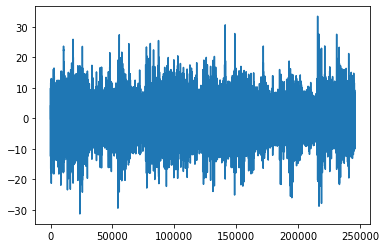

In [10]:
plt.plot(eeg_data.ravel(), label='Original signal')

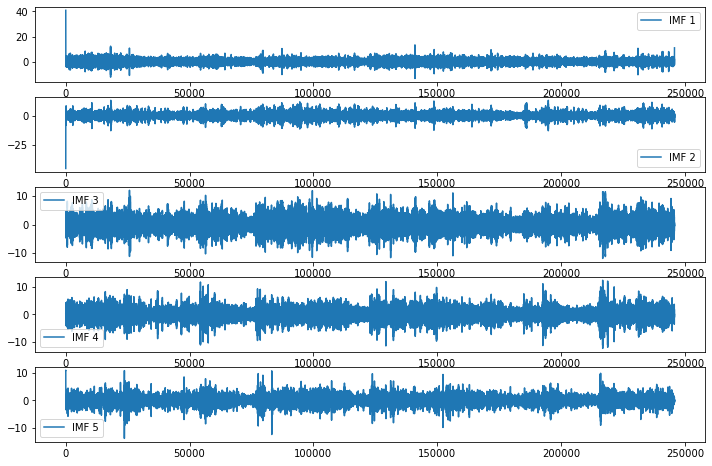

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(eeg_data.ravel(), label='IMFs')
for i, imf in enumerate(imfs):
    plt.subplot(imfs.shape[0], 1, i+1)
    plt.plot(imf, label=f'IMF {i+1}')
    plt.legend()
plt.show()


In [13]:
# Resizing the IMFs to their original shape of the signals (eeg_data)

imf1=imfs[0].reshape(32,7680)
imf2=imfs[1].reshape(32,7680)
imf3=imfs[2].reshape(32,7680)
imf4=imfs[3].reshape(32,7680)
imf5=imfs[4].reshape(32,7680)


In [16]:
imf1.shape

(32, 7680)

In [29]:
# Applying sliding window to the imf data for 5 IMFs

eeg_imf1=[[]*29]*len(imf1)
eeg_imf2=[[]*29]*len(imf2)
eeg_imf3=[[]*29]*len(imf3)
eeg_imf4=[[]*29]*len(imf4)
eeg_imf5=[[]*29]*len(imf5)
for i in range(1,len(imf1)+1):
    
    if (2*(i-1)+4)<=60:
        eeg_imf1[i-1].append(imf1[i-1][2*(i-1)*128:(2*(i-1)+4)*128])
        eeg_imf2[i-1].append(imf2[i-1][2*(i-1)*128:(2*(i-1)+4)*128])
        eeg_imf3[i-1].append(imf3[i-1][2*(i-1)*128:(2*(i-1)+4)*128])
        eeg_imf4[i-1].append(imf4[i-1][2*(i-1)*128:(2*(i-1)+4)*128])
        eeg_imf5[i-1].append(imf5[i-1][2*(i-1)*128:(2*(i-1)+4)*128])

In [30]:
eeg_imf1=np.array(eeg_imf1) #(32, 29, 512)
eeg_imf2=np.array(eeg_imf2)
eeg_imf3=np.array(eeg_imf3)
eeg_imf4=np.array(eeg_imf4)
eeg_imf5=np.array(eeg_imf5)

In [31]:
eeg_imf1.shape

(32, 29, 512)

In [32]:
# Declaring Gaussian Normalization function and applying to the eeg_imf data

def gaussian_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    gaussian = norm.cdf(data, mean, std)
    return gaussian

eeg_imf1=gaussian_normalization(eeg_imf1)
eeg_imf2=gaussian_normalization(eeg_imf2)
eeg_imf3=gaussian_normalization(eeg_imf3)
eeg_imf4=gaussian_normalization(eeg_imf4)
eeg_imf5=gaussian_normalization(eeg_imf5)

In [33]:
# Extracting the entropies features from the eeg_imf data

entropies1 = []   #29*32
entropies2 = []
entropies3 = []
entropies4 = []
entropies5 = []

for i in range(1,eeg_imf1.shape[0]+1):
    for j in range(1,eeg_imf1.shape[1]+1):
        prob_dist = np.histogram(eeg_imf1[i-1,j-1, :], bins='fd')[1] / eeg_imf1.shape[2]
        entropies1.append(entropy(prob_dist, base=2))
        prob_dist = np.histogram(eeg_imf2[i-1,j-1, :], bins='fd')[1] / eeg_imf2.shape[2]
        entropies2.append(entropy(prob_dist, base=2))
        prob_dist = np.histogram(eeg_imf3[i-1,j-1, :], bins='fd')[1] / eeg_imf3.shape[2]
        entropies3.append(entropy(prob_dist, base=2))
        prob_dist = np.histogram(eeg_imf4[i-1,j-1, :], bins='fd')[1] / eeg_imf4.shape[2]
        entropies4.append(entropy(prob_dist, base=2))
        prob_dist = np.histogram(eeg_imf5[i-1,j-1, :], bins='fd')[1] / eeg_imf5.shape[2]
        entropies5.append(entropy(prob_dist, base=2))
    
    

In [34]:
# Concatenating the entropies and reshaping

resen=entropies1+entropies2+entropies3+entropies4+entropies5
resen=np.array(resen).reshape(1,29,160)

In [35]:
resen.shape

(1, 29, 160)